In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

In [16]:
df = pd.read_csv("dubai_neighborhood.csv")
df.rename(columns = {"Community": "Neighborhood"} , inplace = True)
df.head()

,Community Number,Neighborhood,Area(km2),Population(2000)
0,126,Abu Hail,1.270,21414.00
1,721,Al Awir,8.670,15463.25
2,333,Al Bada,0.820,18816.00
3,122,Al Baraha,1.104,7823.00
4,373,Al Barsha,8.670,15463.25


# Create new column to represent population denisty for each area

In [17]:
df["Pop_Per_Area"] = df["Population(2000)"]/ df["Area(km2)"]
df = df[df["Pop_Per_Area"]> 2000]
df.shape

(24, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 55
Data columns (total 5 columns):
Community Number    24 non-null int64
Neighborhood        24 non-null object
Area(km2)           24 non-null float64
Population(2000)    24 non-null float64
Pop_Per_Area        24 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


# Calling geolocation to import latitude and longitude for each area in the data frame

In [19]:
list_lat =[]
list_lon = []
for address in df["Neighborhood"]:
#     address = com
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
#     print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
    list_lat.append(latitude)
    list_lon.append(longitude)
    

[25.28594185, 24.7542271, 25.282575549999997, 25.26305655, 25.4792894, 25.2400505, 25.2333597, 25.244402800000003, 24.24352055, 25.26630785, 25.27667725, 25.2738924, 32.2513936, 25.224953149999997, 25.2586171, 25.3790294, 25.19889775, 25.277041699999998, 25.233175, 25.2720137, 36.7833333, 25.265992349999998, 25.1327524, 25.1505288]
[55.32944354478134, 46.8218325, 55.32013863040134, 55.3205840389995, 55.522152, 55.27745853149375, 55.2920503, 55.30475541735386, 55.72212505, 55.324221785431625, 55.30976273508145, 55.32262973029905, 35.0635981, 55.39050657119131, 55.3202189, 55.43072299448985, 55.25704939243696, 55.33729994920512, 55.2773708, 55.4364278, 40.7666667, 55.31742845625631, 55.20585675122375, 55.2087708]


In [20]:
df.insert(5, column="Latitude", value= list_lat)
df.insert(6, column="Longitude", value= list_lon)

df.shape


,Community Number,Neighborhood,Area(km2),Population(2000),Pop_Per_Area,Latitude,Longitude
0,126,Abu Hail,1.270,21414.0,16861.417323,25.285942,55.329444
2,333,Al Bada,0.820,18816.0,22946.341463,24.754227,46.821832
3,122,Al Baraha,1.104,7823.0,7086.050725,25.282576,55.320139
6,114,Al Buteen,0.070,2364.0,33771.428571,25.263057,55.320584
8,313,Al Hamriya,0.720,15104.0,20977.777778,25.479289,55.522152
10,322,Al Hudaiba,0.840,7699.0,9165.476190,25.240050,55.277459
12,323,Al Jafiliya,1.630,11619.0,7128.220859,25.233360,55.292050
13,318,Al Karama,1.509,45674.0,30267.726972,25.244403,55.304755
14,128,Al Khabisi,1.255,6737.0,5368.127490,24.243521,55.722125
19,124,Al Muraqqabat,0.780,32395.0,41532.051282,25.266308,55.324222


# Map to show dubai map with marker for each area name and location

In [22]:
latitude = 25.276987
longitude = 55.296249

map_dubai = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, Neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dubai)  
map_dubai

# Foursquare credintials

In [23]:
CLIENT_ID = 'C1YNQDWJUZXSZPDVDFFFSALYZRTJXHIQ2KINRZWBT4PXXMAF' # your Foursquare ID
CLIENT_SECRET = 'DR4UJBXNUZMU0OJOVMVQE1GCNUEYUWTH430ZY4NCPVJEMMI3' # your Foursquare Secret
VERSION = '20190608' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C1YNQDWJUZXSZPDVDFFFSALYZRTJXHIQ2KINRZWBT4PXXMAF
CLIENT_SECRET:DR4UJBXNUZMU0OJOVMVQE1GCNUEYUWTH430ZY4NCPVJEMMI3


In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    radius= 1000
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
dubai_venues = getNearbyVenues(names=df["Neighborhood"],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Abu Hail
Al Bada
Al Baraha
Al Buteen
Al Hamriya
Al Hudaiba
Al Jafiliya
Al Karama
Al Khabisi
Al Muraqqabat
Al Murar
Al Muteena
Al Ras
Al Rashidiya
Al Rigga
Al Sabkha
Al Wasl
Hor Al Anz
Jumeira
Muhaisnah
Naif
Rigga Al Buteen
Umm Al Sheif
Umm Suqeim


In [28]:
dubai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abu Hail,25.285942,55.329444,Habib Bakery,25.281124,55.332774,Bakery
1,Abu Hail,25.285942,55.329444,Waterfront Market,25.291492,55.323512,Market
2,Abu Hail,25.285942,55.329444,Bin eid traditional restaurant,25.291313,55.326345,Restaurant
3,Abu Hail,25.285942,55.329444,Al Douri Roastery,25.277057,55.328223,Bakery
4,Abu Hail,25.285942,55.329444,Rippling Acres Live Seafood Trading,25.293038,55.324000,Fishing Store


In [29]:
dubai_venues.groupby("Neighborhood").count().reset_index().shape

(22, 7)

# create pivot table for venues with all business categories

In [31]:
dubai_onehot = pd.get_dummies(dubai_venues[['Venue Category']], prefix="", prefix_sep="")
dubai_onehot[["Neighborhood", "Venue"]] = dubai_venues[["Neighborhood", "Venue"]]

fixed_columns = [dubai_onehot.columns[-1]] + list(dubai_onehot.columns[:-1])
dubai_onehot = dubai_onehot[fixed_columns]

fixed_columns = [dubai_onehot.columns[-1]] + list(dubai_onehot.columns[:-1])
dubai_onehot = dubai_onehot[fixed_columns]

dubai_onehot.head()

,Neighborhood,Venue,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Arcade,Arepa Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bavarian Restaurant,Beach,Bed & Breakfast,Bike Trail,Botanical Garden,Boutique,Boxing Gym,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Candy Store,Carpet Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Currency Exchange,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Fishing Store,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Iraqi Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lebanese Restaurant,Light Rail Station,Lounge,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Mobility Store,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Pakistani Restaurant,Park,Pastry Shop,Perfume Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racetrack,Recreation Center,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shawarma Place,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Skydiving Drop Zone,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tech Startup,Thai Restaurant,Theme Park,Track,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Water Park,Women's Store,Zoo
0,Abu Hail,Habib Bakery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abu Hail,Waterfront Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Abu Hail,Bin eid traditional restaurant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Abu Hail,Al Douri Roastery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [32]:
dubai_grouped = dubai_onehot.groupby("Neighborhood").mean().reset_index()
dubai_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Arcade,Arepa Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bavarian Restaurant,Beach,Bed & Breakfast,Bike Trail,Botanical Garden,Boutique,Boxing Gym,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Candy Store,Carpet Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Currency Exchange,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Fishing Store,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Iraqi Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lebanese Restaurant,Light Rail Station,Lounge,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Mobility Store,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Pakistani Restaurant,Park,Pastry Shop,Perfume Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racetrack,Recreation Center,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shawarma Place,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Skydiving Drop Zone,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tech Startup,Thai Restaurant,Theme Park,Track,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Water Park,Women's Store,Zoo
0,Abu Hail,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0,0.117647,0.00,0.000000,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.0,0.117647,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.058824,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.058824,0.0,0.058824,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.058824,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.058824,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.176471,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.058824,0.058824,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,Al Bada,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.014925,0.000000,0.0,0.0,0.014925,0.00,0.0,0.014925,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.014925,0.044776,0.0,0.0,0.014925,0.0,0.0,0.0,0.059701,0.014925,0.0,0.00,0.00,0.014925,0.0,0.104478,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.029851,0.00,0.0,0.029851,0.0,0.029851,0.0,0.0,0.0,0.0,0.014925,0.0,0.044776,0.000000,0.0,0.000000,0.0,0.029851,0.0,0.0,0.0,0.0,0.00,0.0,0.029851,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.

In [33]:
num_top_venues = 2

for hood in dubai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dubai_grouped[dubai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abu Hail----
    venue  freq
0    Park  0.18
1  Bakery  0.12


----Al Bada----
                       venue  freq
0                Coffee Shop  0.10
1  Middle Eastern Restaurant  0.07


----Al Baraha----
                  venue  freq
0                 Hotel  0.18
1  Fast Food Restaurant  0.09


----Al Buteen----
                       venue  freq
0                      Hotel  0.17
1  Middle Eastern Restaurant  0.11


----Al Hamriya----
               venue  freq
0        Golf Course   1.0
1  Accessories Store   0.0


----Al Hudaiba----
   venue  freq
0  Hotel  0.09
1   Café  0.08


----Al Jafiliya----
         venue  freq
0        Hotel  0.09
1  Coffee Shop  0.07


----Al Karama----
               venue  freq
0  Indian Restaurant  0.25
1               Café  0.06


----Al Khabisi----
         venue  freq
0  Coffee Shop  0.13
1         Café  0.11


----Al Muraqqabat----
                       venue  freq
0                      Hotel  0.16
1  Middle Eastern Restaurant  0.11


----Al M

# Creating a function to return the top venues for each neighborhood(row)

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dubai_grouped['Neighborhood']

for ind in np.arange(dubai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dubai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abu Hail,Park,Bakery,Coffee Shop,Fishing Store,Seafood Restaurant,Filipino Restaurant,Beach,Scenic Lookout,Market,Dessert Shop
1,Al Bada,Coffee Shop,Middle Eastern Restaurant,Café,Fast Food Restaurant,Pizza Place,Supermarket,Breakfast Spot,Shopping Mall,Donut Shop,Indian Restaurant
2,Al Baraha,Hotel,Indian Restaurant,Fast Food Restaurant,African Restaurant,Intersection,Lounge,Café,Park,Smoke Shop,Bar
3,Al Buteen,Hotel,Middle Eastern Restaurant,Coffee Shop,Café,Restaurant,Filipino Restaurant,Ice Cream Shop,Fast Food Restaurant,Juice Bar,Persian Restaurant
4,Al Hamriya,Golf Course,Zoo,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fabric Shop,Event Space,Ethiopian Restaurant


In [38]:
neighborhoods_venues_sorted.describe(include="O")

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,22,22,22,22,22,22,22,22,22,22,22
unique,22,10,10,13,16,16,13,19,21,21,20
top,Al Muraqqabat,Hotel,Middle Eastern Restaurant,Café,Café,Coffee Shop,Filipino Restaurant,Ice Cream Shop,American Restaurant,Indian Restaurant,Persian Restaurant
freq,1,9,7,3,3,4,4,2,2,2,2


# Most Common venues type:
# 1- Hotel
# 2- Restaurant
# 3 Cafe / Coffee shop

In [69]:
# set number of clusters
kclusters = 5

dubai_grouped_clustering = dubai_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dubai_grouped_clustering)
clus_labels = kmeans.labels_
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 0, 0, 1, 2, 2, 2, 2, 0], dtype=int32)

# Instering cluster labels with grouped data frame

In [70]:
dubai_merged = pd.DataFrame(dubai_grouped["Neighborhood"])

dubai_merged.insert(0,'Cluster Labels',clus_labels)

dubai_merged = dubai_merged.join(neighborhoods_venues_sorted.set_index("Neighborhood"),on = "Neighborhood")

dubai_merged = dubai_merged.join(df.set_index("Neighborhood"), on ="Neighborhood")

# dubai_merged = pd.concat([dubai_merged, df[["Latitude", "Longitude"]]], axis=1)

dubai_merged.dropna(inplace = True)

dubai_merged["Cluster Labels"] = dubai_merged["Cluster Labels"].astype("int")

dubai_merged.shape


(22, 18)

# Creating map with cluster for each area.

In [71]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dubai_merged['Latitude'], dubai_merged['Longitude'], dubai_merged['Neighborhood'], dubai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
       
map_clusters

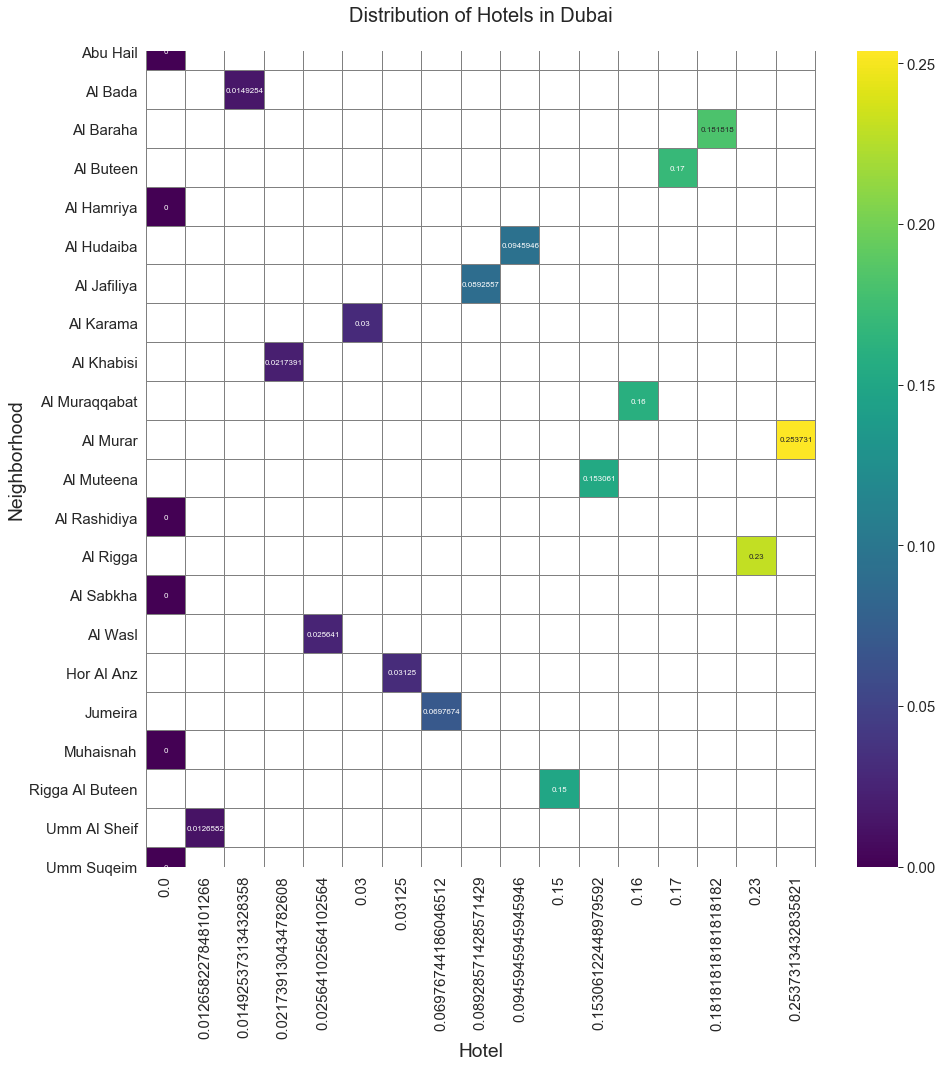

In [72]:
Target_Business ='Hotel'

result = dubai_grouped.pivot(index='Neighborhood', columns=Target_Business, values=Target_Business)

plt.rcParams.update(plt.rcParamsDefault)

%matplotlib inline

sns.set(context='paper', style='white', palette='deep', font='sans-serif', font_scale=2 , color_codes=True, rc=None)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15) # fontsize of the tick labels
plt.rcParams['figure.figsize'] = [15, 15]
#plt.rc('figure', titlesize=30) 
plt.rcParams.update({'font.size': 8})
plt.title('Distribution of Hotels in Dubai', fontdict = {'fontsize' : 20}, pad=30)
sns.heatmap(result, annot=True, cmap='viridis', linewidths = 0.01 , linecolor='grey', cbar=True, fmt="g")

# Most Common places with Hotels:
# 1- Al Murar
# 2- Al Rigga
# 3- Al Baraha
# 4- Al Buteen

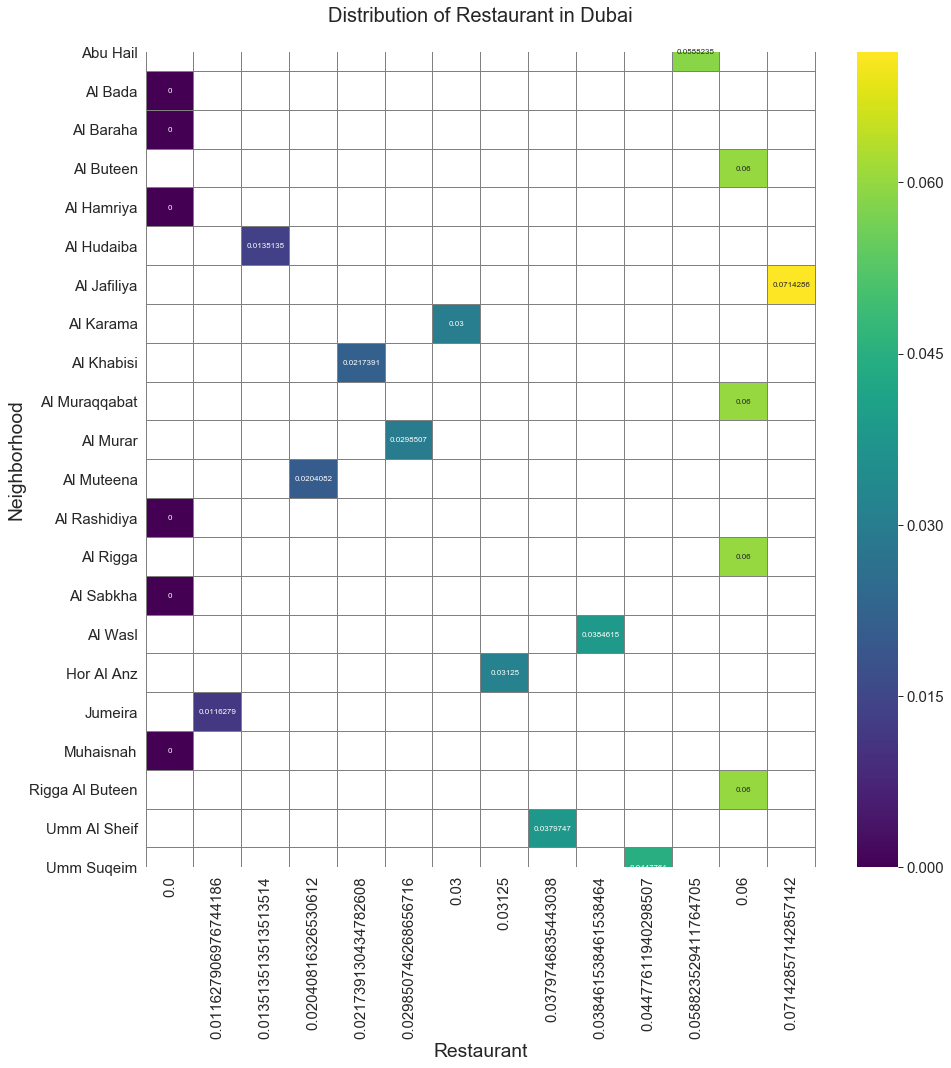

In [73]:
Target_Business ='Restaurant'

result = dubai_grouped.pivot(index='Neighborhood', columns=Target_Business, values=Target_Business)

plt.rcParams.update(plt.rcParamsDefault)

%matplotlib inline

sns.set(context='paper', style='white', palette='deep', font='sans-serif', font_scale=2 , color_codes=True, rc=None)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15) # fontsize of the tick labels
plt.rcParams['figure.figsize'] = [15, 15]
#plt.rc('figure', titlesize=30) 
plt.rcParams.update({'font.size': 8})
plt.title('Distribution of Restaurant in Dubai', fontdict = {'fontsize' : 20}, pad=30)
sns.heatmap(result, annot=True, cmap='viridis', linewidths = 0.01 , linecolor='grey', cbar=True, fmt="g")

# Most Common places with Restaurant:
# 1- Al Jaffiliya
# 2- Al Rigga/ Al Murraqabat
# 3- Abu Hail
# 4- Um Suqeim

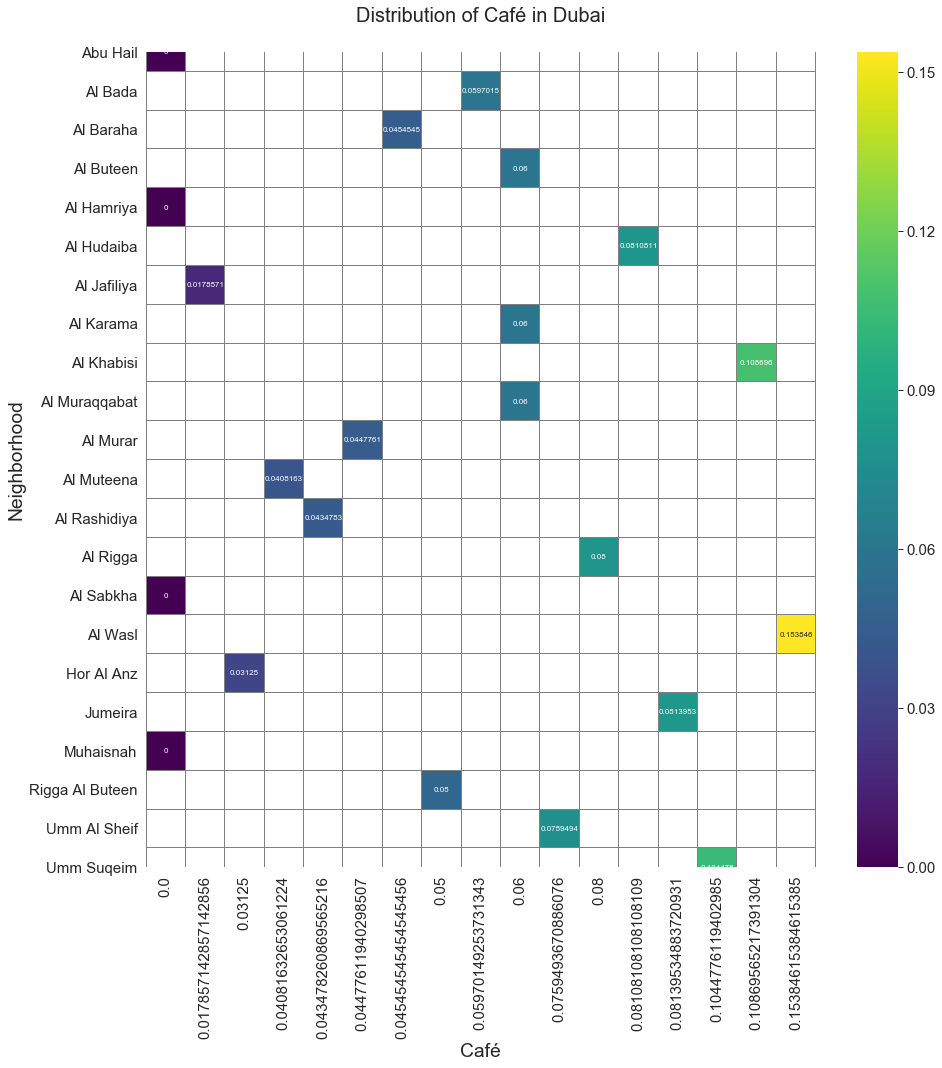

In [74]:
Target_Business ='Café'

result = dubai_grouped.pivot(index='Neighborhood', columns=Target_Business, values=Target_Business)

plt.rcParams.update(plt.rcParamsDefault)

%matplotlib inline

sns.set(context='paper', style='white', palette='deep', font='sans-serif', font_scale=2 , color_codes=True, rc=None)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15) # fontsize of the tick labels
plt.rcParams['figure.figsize'] = [15, 15]
#plt.rc('figure', titlesize=30) 
plt.rcParams.update({'font.size': 8})
plt.title('Distribution of Café in Dubai', fontdict = {'fontsize' : 20}, pad=30)
sns.heatmap(result, annot=True, cmap='viridis', linewidths = 0.01 , linecolor='grey', cbar=True, fmt="g")

# Most popular palces with Cafe/ Coffee shop:
# 1- Al Wasl
# 2- Al Khabisi
# 3- Umm Suqeim
# 4- Jumeira

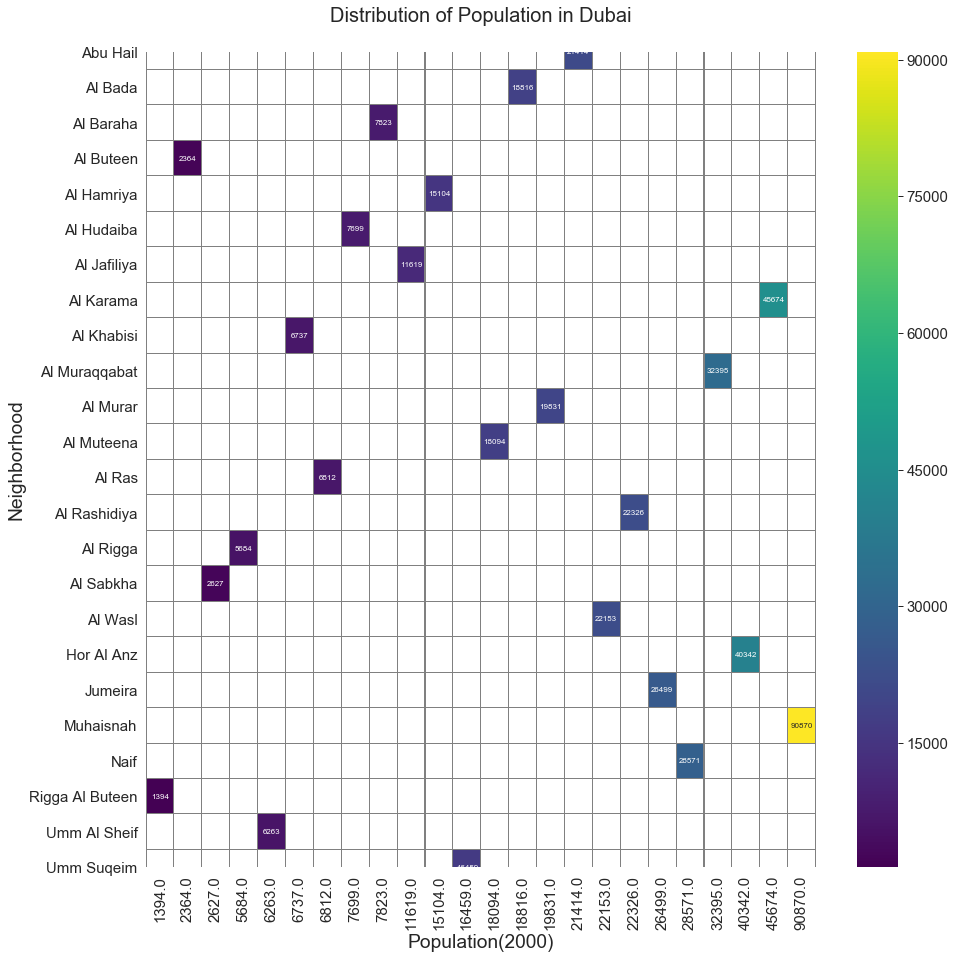

In [75]:
Target_Business ='Population(2000)'

result = df.pivot(index='Neighborhood', columns=Target_Business, values=Target_Business)

plt.rcParams.update(plt.rcParamsDefault)

%matplotlib inline

sns.set(context='paper', style='white', palette='deep', font='sans-serif', font_scale=2 , color_codes=True, rc=None)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15) # fontsize of the tick labels
plt.rcParams['figure.figsize'] = [15, 15]
#plt.rc('figure', titlesize=30) 
plt.rcParams.update({'font.size': 8})
plt.title('Distribution of Population in Dubai', fontdict = {'fontsize' : 20}, pad=30)
sns.heatmap(result, annot=True, cmap='viridis', linewidths = 0.01 , linecolor='grey', cbar=True, fmt="g")

# Most populated Areas:
# 1- Muhaisnah
# 2- Al Karama
# 3- Hor Al Anz
# 4- Al Murraqabat

# ____________________________________________________________________

# Show every cluster category for more explorotory 

In [50]:
df_cluster0 = dubai_merged[dubai_merged["Cluster Labels"] == 0]
df_cluster0

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
2,0,Al Baraha,Hotel,Indian Restaurant,Fast Food Restaurant,African Restaurant,Intersection,Lounge,Café,Park,Smoke Shop,Bar,24.754227,46.821832
3,0,Al Buteen,Hotel,Middle Eastern Restaurant,Coffee Shop,Café,Restaurant,Filipino Restaurant,Ice Cream Shop,Fast Food Restaurant,Juice Bar,Persian Restaurant,25.282576,55.320139
10,0,Al Murar,Hotel,Middle Eastern Restaurant,Fast Food Restaurant,Asian Restaurant,Café,Lounge,Women's Store,Bar,Indian Restaurant,Clothing Store,25.240050,55.277459
13,0,Al Rigga,Hotel,Café,Middle Eastern Restaurant,Restaurant,Coffee Shop,BBQ Joint,Filipino Restaurant,Ice Cream Shop,Turkish Restaurant,Fast Food Restaurant,25.244403,55.304755
19,0,Rigga Al Buteen,Hotel,Middle Eastern Restaurant,Restaurant,Café,Ice Cream Shop,Asian Restaurant,Fast Food Restaurant,Coffee Shop,Indian Restaurant,Persian Restaurant,25.266308,55.324222


In [78]:
df_cluster1 = dubai_merged[dubai_merged["Cluster Labels"] == 1]
df_cluster1

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Community Number,Area(km2),Population(2000),Pop_Per_Area,Latitude,Longitude
4,1,Al Hamriya,Golf Course,Zoo,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fabric Shop,Event Space,Ethiopian Restaurant,313,0.72,15104.0,20977.777778,25.479289,55.522152


In [79]:
df_cluster2 = dubai_merged[dubai_merged["Cluster Labels"] == 2]
df_cluster2

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Community Number,Area(km2),Population(2000),Pop_Per_Area,Latitude,Longitude
0,2,Abu Hail,Park,Bakery,Coffee Shop,Fishing Store,Seafood Restaurant,Filipino Restaurant,Beach,Scenic Lookout,Market,Dessert Shop,126,1.270,21414.0,16861.417323,25.285942,55.329444
1,2,Al Bada,Coffee Shop,Middle Eastern Restaurant,Café,Fast Food Restaurant,Pizza Place,Supermarket,Breakfast Spot,Shopping Mall,Donut Shop,Indian Restaurant,333,0.820,18816.0,22946.341463,24.754227,46.821832
5,2,Al Hudaiba,Hotel,Middle Eastern Restaurant,Café,Asian Restaurant,Coffee Shop,Chinese Restaurant,Indian Restaurant,Convenience Store,Pizza Place,Pakistani Restaurant,322,0.840,7699.0,9165.476190,25.240050,55.277459
6,2,Al Jafiliya,Hotel,Coffee Shop,Restaurant,Asian Restaurant,Middle Eastern Restaurant,Lounge,Pub,Spa,Steakhouse,Breakfast Spot,323,1.630,11619.0,7128.220859,25.233360,55.292050
7,2,Al Karama,Indian Restaurant,Café,Asian Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Supermarket,North Indian Restaurant,Bakery,BBQ Joint,318,1.509,45674.0,30267.726972,25.244403,55.304755
8,2,Al Khabisi,Coffee Shop,Fast Food Restaurant,Café,Department Store,Supermarket,Shopping Mall,Lounge,American Restaurant,Italian Restaurant,Jewelry Store,128,1.255,6737.0,5368.127490,24.243521,55.722125
12,2,Al Rashidiya,Cafeteria,Coffee Shop,Grocery Store,Middle Eastern Restaurant,Basketball Court,Bakery,Supermarket,Clothing Store,Fried Chicken Joint,Burger Joint,216,4.410,22326.0,5062.585034,25.224953,55.390507
15,2,Al Wasl,Café,Middle Eastern Restaurant,Ice Cream Shop,Coffee Shop,Burger Joint,Restaurant,Bakery,Steakhouse,Movie Theater,Pizza Place,343,4.760,22153.0,4653.991597,25.198898,55.257049
16,2,Hor Al Anz,Indian Restaurant,Market,Fast Food Restaurant,Pharmacy,Department Store,Bakery,Burrito Place,Restaurant,Café,Convenience Store,127,4.180,40342.0,9651.196172,25.277042,55.337300
17,2,Jumeira,Asian Restaurant,Café,Middle Eastern Restaurant,Hotel,Coffee Shop,Bar,Pizza Place,Indian Restaurant,Electronics Store,Fried Chicken Joint,332,6.900,26499.0,3840.434783,25.233175,55.277371


In [80]:
df_cluster3 = dubai_merged[dubai_merged["Cluster Labels"] == 3]
df_cluster3

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Community Number,Area(km2),Population(2000),Pop_Per_Area,Latitude,Longitude
14,3,Al Sabkha,Shopping Plaza,Pool Hall,Football Stadium,Movie Theater,Cafeteria,Donut Shop,Farmers Market,Falafel Restaurant,Fabric Shop,Event Space,115,0.13,2627.0,20207.692308,25.379029,55.430723


In [81]:
df_cluster4 = dubai_merged[dubai_merged["Cluster Labels"] == 4]
df_cluster4

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Community Number,Area(km2),Population(2000),Pop_Per_Area,Latitude,Longitude
18,4,Muhaisnah,Music Venue,Currency Exchange,Market,Bus Station,Electronics Store,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fabric Shop,261,8.67,90870.0,10480.968858,25.272014,55.436428
